# Calculating calibration densities and plotting models at UCB
- This workbook shows how we calculate densities for calibration data, plot models and calculate the cali lines

In [1]:
# Import useful python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import os
import datetime

## Downloading DiadFit locally
- The easiest way to install diad fit is by removing the #. It will install from PyPI
- You only need to do this once on each computer, or run in order to grab an updated version. 

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [3]:
import DiadFit as pf
pf.__version__

'0.0.59'

## Import the data (after fitting and pressure matching)

In [8]:
caldata=pd.read_excel(r"C:\Users\charl\Documents\Instruments and calibrations\UCB_6-8-23\merged_dataframe.xlsx").drop(columns={'Unnamed: 0'})
caldata['filename_merge']=caldata['filename_nocrr'].str.split(" ").str.get(1)
caldata.head()

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,unix_timestamp,duration_s,start_time_P,end_time_P,median_pressure,mad_pressure,median_temp,mad_temp,filename_nocrr,filename_merge
0,103.298551,103.303940,103.293162,0.005389,06 FDCA-P60-1_CRR_DiadFit,103.548947,0.006325,0.005347,1285.110681,0.005234,...,1686227249,52,2023-06-08 12:27:28.025,2023-06-08 12:28:20.025,7.163984,0.000772,32.123047,0.001447,06 FDCA-P60-1,FDCA-P60-1
1,103.302037,103.307423,103.296651,0.005386,07 FDCA-P60-2,103.552475,0.006376,0.005343,1285.106366,0.005216,...,1686227313,51,2023-06-08 12:28:34.030,2023-06-08 12:29:25.030,7.167908,0.000840,32.125000,0.001804,07 FDCA-P60-2,FDCA-P60-2
2,103.303029,103.308260,103.297797,0.005231,08 FDCA-P60-3,103.553497,0.006165,0.005187,1285.105751,0.005070,...,1686227365,51,2023-06-08 12:29:25.031,2023-06-08 12:30:16.031,7.170808,0.000655,32.134277,0.002484,08 FDCA-P60-3,FDCA-P60-3
3,103.360624,103.363757,103.357491,0.003133,10 FDCA-P59-1,103.611642,0.004099,0.003045,1284.961979,0.002709,...,1686228151,51,2023-06-08 12:42:31.023,2023-06-08 12:43:22.023,7.433209,0.001135,32.104492,0.001043,10 FDCA-P59-1,FDCA-P59-1
4,103.379783,103.382467,103.377099,0.002684,11 FDCA-P58-1,103.631029,0.003250,0.002579,1284.916416,0.002452,...,1686228510,51,2023-06-08 12:48:31.070,2023-06-08 12:49:22.070,7.535690,0.000389,32.155273,0.001690,11 FDCA-P58-1,FDCA-P58-1


In [9]:
manualdata=pd.read_excel(r"C:\Users\charl\Documents\Instruments and calibrations\UCB_6-8-23\Experiment_37C_6-8-23.xlsx")
manualdata.head()

,Label,P_kbar,T_K,CO2_dens_gcm3,P_Mpa_target,P_manual,T0_manual,T1_manual,T2_manual,T3_manual,T4_manual,Offset
0,FDCA-P28-1,0.095909,310.15,0.660905,9.590924,9.6752,36.975,36.976,36.976,36.976,36.975,NaN
1,FDCA-P29-1,0.093876,310.15,0.646865,9.387566,9.4594,37.002,37.003,37.003,37.003,37.003,NaN
2,FDCA-P30-1,0.092172,310.15,0.632824,9.217169,9.2497,36.978,36.980,36.981,36.982,36.983,NaN
3,FDCA-P31-1,0.090746,310.15,0.618784,9.074609,9.0269,36.995,36.994,36.993,36.993,36.991,NaN
4,FDCA-P32-1,0.089553,310.15,0.604743,8.955350,8.9823,37.015,37.015,37.015,37.016,37.017,NaN


In [13]:
merged_df = pd.merge(right=caldata, left=manualdata, right_on='filename_merge',left_on='Label')
merged_df.to_clipboard(excel=True)

In [14]:
#creates a column with a new column that splits the filename to sample name (FDCA-P1-1 becomes FDCA-P1)
merged_df['filename_split'] = merged_df['filename_x'].str.split('-', n=2).str[:2].str.join('-')
merged_df.head()

,Label,P_kbar,T_K,CO2_dens_gcm3,P_Mpa_target,P_manual,T0_manual,T1_manual,T2_manual,T3_manual,...,duration_s,start_time_P,end_time_P,median_pressure,mad_pressure,median_temp,mad_temp,filename_nocrr,filename_merge,filename_split
0,FDCA-P28-1,0.095909,310.15,0.660905,9.590924,9.6752,36.975,36.976,36.976,36.976,...,51,2023-06-08 16:57:40.412,2023-06-08 16:58:31.412,9.673804,0.000595,32.446289,0.000977,58 FDCA-P28-1,FDCA-P28-1,58 FDCA-P28
1,FDCA-P29-1,0.093876,310.15,0.646865,9.387566,9.4594,37.002,37.003,37.003,37.003,...,51,2023-06-08 16:36:55.358,2023-06-08 16:37:46.358,9.250386,0.000533,32.447266,0.001210,56 FDCA-P29-1,FDCA-P29-1,56 FDCA-P29
2,FDCA-P30-1,0.092172,310.15,0.632824,9.217169,9.2497,36.978,36.980,36.981,36.982,...,52,2023-06-08 16:34:58.359,2023-06-08 16:35:50.359,9.253401,0.000711,32.433105,0.004123,55 FDCA-P30-1,FDCA-P30-1,55 FDCA-P30
3,FDCA-P31-1,0.090746,310.15,0.618784,9.074609,9.0269,36.995,36.994,36.993,36.993,...,51,2023-06-08 16:19:01.369,2023-06-08 16:19:52.369,9.027366,0.000695,32.666016,0.001157,53 FDCA-P31-1,FDCA-P31-1,53 FDCA-P31
4,FDCA-P32-1,0.089553,310.15,0.604743,8.955350,8.9823,37.015,37.015,37.015,37.016,...,51,2023-06-08 16:14:19.374,2023-06-08 16:15:10.374,8.981870,0.000870,32.707520,0.003147,52 FDCA-P32-1,FDCA-P32-1,52 FDCA-P32


## Calculate mean T

In [16]:
merged_df['T_C_mean'] = merged_df[['T0_manual', 'T1_manual', 'T2_manual', 'T3_manual', 'T4_manual']].replace(0, np.nan).mean(axis=1, skipna=True)
merged_df['T_C_std'] = merged_df[['T0_manual', 'T1_manual', 'T2_manual', 'T3_manual', 'T4_manual']].replace(0, np.nan).std(axis=1, skipna=True)

merged_df['rho_gmL']=pf.calculate_rho_for_P_T(P_kbar=np.array(merged_df['median_pressure']/100),
                                               T_K=np.array(merged_df['T_C_mean']+273.15), EOS='SW96')

merged_df.to_clipboard(excel=True)
merged_df.to_excel(r"C:\Users\charl\Documents\Instruments and calibrations\UCB_6-8-23"+'/'+'merged_df_wrho.xlsx')
merged_df.head()

,Label,P_kbar,T_K,CO2_dens_gcm3,P_Mpa_target,P_manual,T0_manual,T1_manual,T2_manual,T3_manual,...,median_pressure,mad_pressure,median_temp,mad_temp,filename_nocrr,filename_merge,filename_split,T_C_mean,T_C_std,rho_gmL
0,FDCA-P28-1,0.095909,310.15,0.660905,9.590924,9.6752,36.975,36.976,36.976,36.976,...,9.673804,0.000595,32.446289,0.000977,58 FDCA-P28-1,FDCA-P28-1,58 FDCA-P28,36.9756,0.000548,0.666442
1,FDCA-P29-1,0.093876,310.15,0.646865,9.387566,9.4594,37.002,37.003,37.003,37.003,...,9.250386,0.000533,32.447266,0.001210,56 FDCA-P29-1,FDCA-P29-1,56 FDCA-P29,37.0028,0.000447,0.635696
2,FDCA-P30-1,0.092172,310.15,0.632824,9.217169,9.2497,36.978,36.980,36.981,36.982,...,9.253401,0.000711,32.433105,0.004123,55 FDCA-P30-1,FDCA-P30-1,55 FDCA-P30,36.9808,0.001924,0.636492
3,FDCA-P31-1,0.090746,310.15,0.618784,9.074609,9.0269,36.995,36.994,36.993,36.993,...,9.027366,0.000695,32.666016,0.001157,53 FDCA-P31-1,FDCA-P31-1,53 FDCA-P31,36.9932,0.001483,0.613721
4,FDCA-P32-1,0.089553,310.15,0.604743,8.955350,8.9823,37.015,37.015,37.015,37.016,...,8.981870,0.000870,32.707520,0.003147,52 FDCA-P32-1,FDCA-P32-1,52 FDCA-P32,37.0156,0.000894,0.607595


## Plot of manually recorded pressure vs pressure transducer median and standard deviation over analysis duration

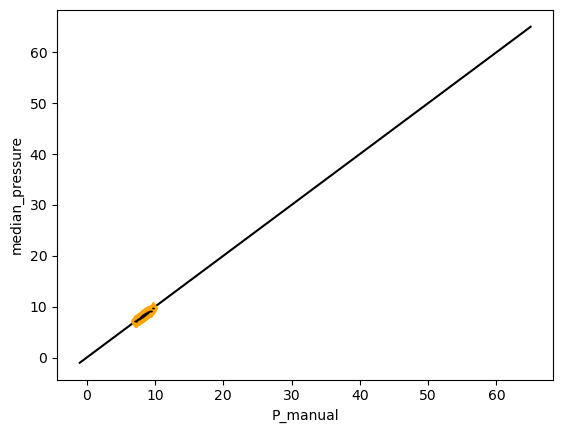

In [17]:
plt.errorbar(y=merged_df['median_pressure'],x=merged_df['P_manual'], yerr=merged_df['mad_pressure'], fmt='d',
             color='orange',mfc='orange', ecolor='black', capsize=1,barsabove=True,zorder=2)

plt.plot([-1, 65], [-1,65], color='black', linestyle='-',zorder=-1)

plt.xlabel('P_manual')
plt.ylabel('median_pressure')
plt.show()

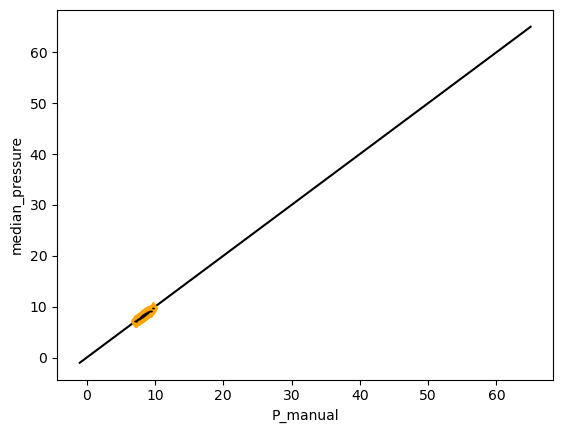

In [18]:
plt.errorbar(y=merged_df['median_pressure'],x=merged_df['P_manual'], yerr=merged_df['mad_pressure'], fmt='d',
             color='orange',mfc='orange', ecolor='black', capsize=1,barsabove=True,zorder=2)

plt.plot([-1, 65], [-1,65], color='black', linestyle='-',zorder=-1)

plt.xlabel('P_manual')
plt.ylabel('median_pressure')
plt.show()

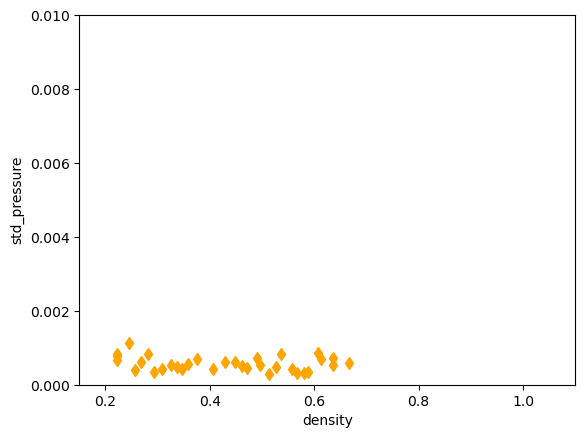

In [19]:
plt.errorbar(y=merged_df['mad_pressure'],x=merged_df['rho_gmL'],  fmt='d',
             color='orange',mfc='orange', ecolor='black', capsize=1,barsabove=True,zorder=2)

# plt.plot([-1, 65], [-1,65], color='black', linestyle='-',zorder=-1)

plt.xlabel('density')
plt.ylabel('std_pressure')
plt.xlim([0.15,1.1])
plt.ylim([0,0.01])
plt.show()

## Plot of density vs fermi splitting

In [20]:
if os.path.exists(r"C:\Users\charl\Desktop\1-s2.0-S0009254121004654-mmc1.xlsx"):
    cornellcell=pd.read_excel(r"C:\Users\charl\Desktop\1-s2.0-S0009254121004654-mmc1.xlsx")

In [21]:
rho_cornell=pf.calculate_density_cornell(temp='SupCrit', Split=merged_df['Corrected_Splitting'])
merged_df['cornellEQ_predrho']=rho_cornell['Preferred D']
merged_df.head()

,Label,P_kbar,T_K,CO2_dens_gcm3,P_Mpa_target,P_manual,T0_manual,T1_manual,T2_manual,T3_manual,...,mad_pressure,median_temp,mad_temp,filename_nocrr,filename_merge,filename_split,T_C_mean,T_C_std,rho_gmL,cornellEQ_predrho
0,FDCA-P28-1,0.095909,310.15,0.660905,9.590924,9.6752,36.975,36.976,36.976,36.976,...,0.000595,32.446289,0.000977,58 FDCA-P28-1,FDCA-P28-1,58 FDCA-P28,36.9756,0.000548,0.666442,0.668065
1,FDCA-P29-1,0.093876,310.15,0.646865,9.387566,9.4594,37.002,37.003,37.003,37.003,...,0.000533,32.447266,0.001210,56 FDCA-P29-1,FDCA-P29-1,56 FDCA-P29,37.0028,0.000447,0.635696,0.641484
2,FDCA-P30-1,0.092172,310.15,0.632824,9.217169,9.2497,36.978,36.980,36.981,36.982,...,0.000711,32.433105,0.004123,55 FDCA-P30-1,FDCA-P30-1,55 FDCA-P30,36.9808,0.001924,0.636492,0.642085
3,FDCA-P31-1,0.090746,310.15,0.618784,9.074609,9.0269,36.995,36.994,36.993,36.993,...,0.000695,32.666016,0.001157,53 FDCA-P31-1,FDCA-P31-1,53 FDCA-P31,36.9932,0.001483,0.613721,0.617648
4,FDCA-P32-1,0.089553,310.15,0.604743,8.955350,8.9823,37.015,37.015,37.015,37.016,...,0.000870,32.707520,0.003147,52 FDCA-P32-1,FDCA-P32-1,52 FDCA-P32,37.0156,0.000894,0.607595,0.611878


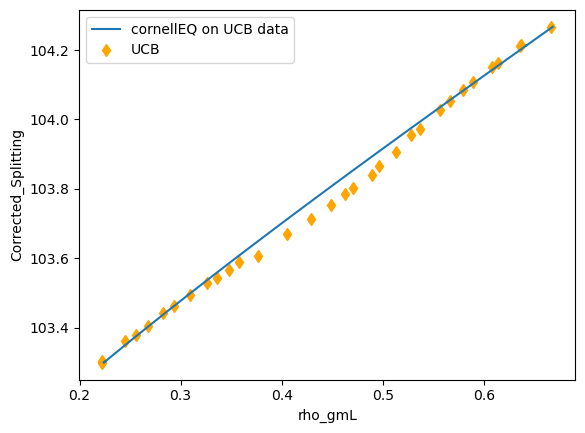

In [22]:
fig,ax=plt.subplots()

x='rho_gmL'
y='Corrected_Splitting'
ax.errorbar(x=merged_df[x],y=merged_df[y], fmt='d',
             color='orange',mfc='orange', ecolor='black', capsize=1,barsabove=True,zorder=2,
           label='UCB')


ax.plot(merged_df['cornellEQ_predrho'],merged_df[y],label='cornellEQ on UCB data')
# ax2=ax.twinx()
# ax2.plot(merged_df['Corrected_Splitting'],merged_df['median_temp'],color='darkred')
# ax2.set_ylabel('Sensor_T')

ax.set_xlabel(x)
ax.set_ylabel(y)
plt.legend()


plt.show()